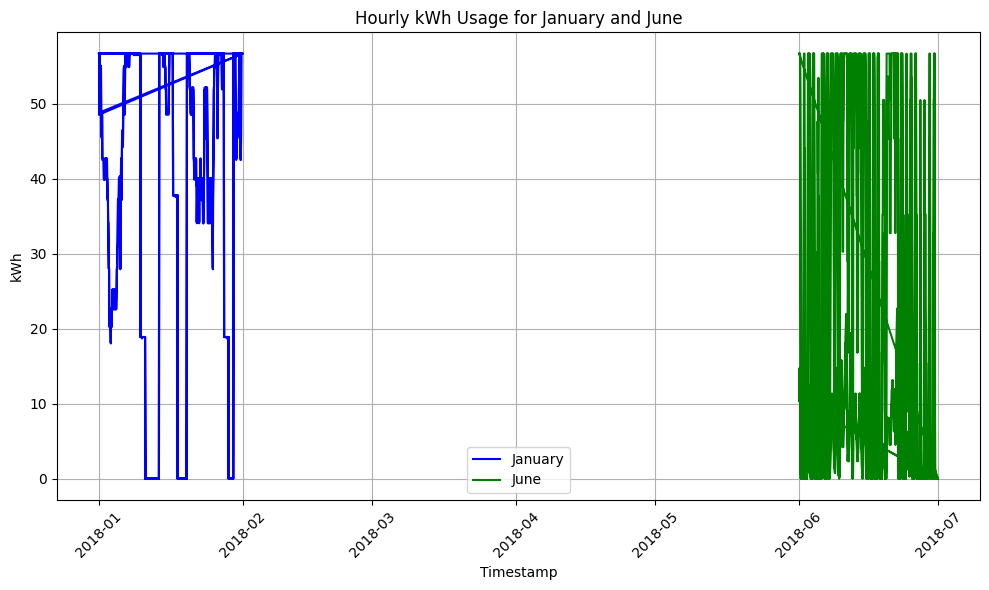

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Get all CSV files matching the pattern
files = glob.glob('Wasilla_hourly_kwh_data_*.csv')  

# Prepare DataFrame to hold all the data
all_data = pd.DataFrame()

# Load and concatenate data from all files
for file in files:
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S') 
    all_data = pd.concat([all_data, df])

# Filter data for January and June
data_january = all_data[all_data['timestamp'].dt.month == 1]
data_june = all_data[all_data['timestamp'].dt.month == 6]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_january['timestamp'], data_january['HP_kWh'], label='January', color='blue')
plt.plot(data_june['timestamp'], data_june['HP_kWh'], label='June', color='green')

plt.title('Hourly kWh Usage for January and June')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()
plt.show()
